<a href="https://colab.research.google.com/github/podo47/DM_KMean_Cluster/blob/main/DM_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering - K-means

## Import library

In [ ]:
import os
import csv
import math
import random
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

## Mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## k-means clustering (with Elbow method)

In [ ]:
class KMC:
  def __init__(self, data):
    self.data = data
    self.X = self.data[:][0]
    self.Y = self.data[:][1]

  # Assign points to clusters based on nearest centroid
  def assign_points(self,k,centroids):
    clusters = [[] for i in range(k)]
    for i in range(len(self.X)):
      distances = [math.sqrt((self.X[i]-centroid[0])**2 + (self.Y[i]-centroid[1])**2) for centroid in centroids]
      min_index, min_distance = min(enumerate(distances), key=lambda x: x[1])
      clusters[min_index].append((self.X[i],self.Y[i]))
    return clusters

  def k_means_cluster(self, k, max_iterations=500):
    # Randomly initialize centroids
    centroids = []
    for i in range(k):
      centroid = [random.uniform(min(self.X), max(self.X)),random.uniform(min(self.Y), max(self.Y))]
      centroids.append(centroid)

    # Assign points to clusters based on nearest centroid
    clusters = self.assign_points(k,centroids)

    # Update centroids with mean of points in each cluster
    iterations = 0
    while True:
      new_centroids = []
      for cluster in clusters:
          if not cluster:
              new_centroids.append([random.uniform(min(self.X), max(self.X)),random.uniform(min(self.Y), max(self.Y))])
          else:
              new_centroid = [sum(point[0] for point in cluster) / len(cluster), 
                              sum(point[1] for point in cluster) / len(cluster)]
              new_centroids.append(new_centroid)

      # Check for terminal condition
      if new_centroids == centroids or iterations >= max_iterations:
          break

      iterations += 1
      centroids = new_centroids

      # Using new centroids to reassign points to clusters 
      clusters = self.assign_points(k,centroids)

    return clusters, centroids

  def elbow_method(self, max_k):
    sse = []
    for k in range(1, max_k+1):
      clusters, centroids = self.k_means_cluster(k)
      sse_k = 0
      for i in range(k):
          for point in clusters[i]:
            sse_k += (point[0] - centroids[i][0])**2 + (point[1] - centroids[i][1])**2
      sse.append(sse_k)
    return sse

  def plot_elbow_method(self, max_k, dataname):
    sse = self.elbow_method(max_k)
    plt.plot(range(1, max_k+1), sse, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.title('Elbow Method'+dataname)
    plt.savefig('/content/drive/MyDrive/Data_Mining/Cluster/elbow_img/elbow_'+dataname+'.png')
    plt.show()
    plt.close()

## Determine k

In [ ]:
def determine_k(data_dict):
  for name,data in data_dict.items():
    kmc = KMC(data)
    kmc.plot_elbow_method(max_k=10,dataname=name)

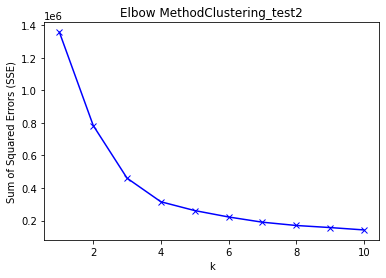

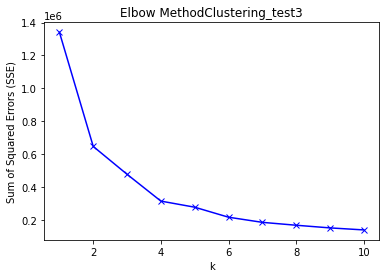

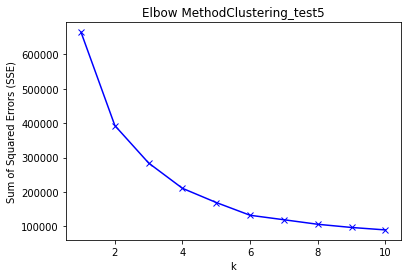

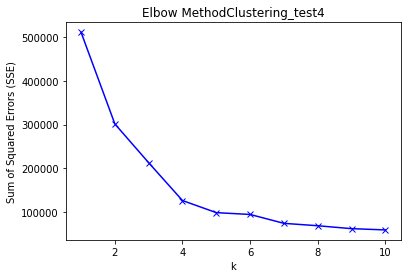

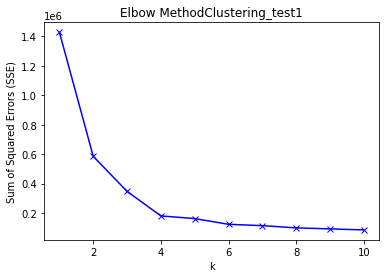

In [ ]:
determine_k(data)

### Result : k

Base on the result of elbow method, the proper value of k for each test data is :

1. Clustering_test1 : 4
2. Clustering_test2 : 4
3. Clustering_test3 : 4
4. Clustering_test4 : 5
5. Clustering_test5 : 6

## K-means clustering

In [ ]:
def kmc_main(data_dict):
  result = {}
  for name,data in data_dict.items():
    kmc = KMC(data)
    if name == 'Clustering_test4':
      clusters, centroids = kmc.k_means_cluster(k=5)
    elif name == 'Clustering_test5':
      clusters, centroids = kmc.k_means_cluster(k=6)
    else:
      clusters, centroids = kmc.k_means_cluster(k=4)

    result[name] = clusters

  return result

## Answer form

In [ ]:
def ans(result):
  for name,test in result.items():
    with open('/content/drive/MyDrive/Data_Mining/Cluster/output_'+name+'.csv', 'w', newline='') as csvfile:
      fieldnames = ['Point','→','ClusterID']
      csvfile = csv.writer(csvfile)
      csvfile.writerow(fieldnames)
      for i in range(len(test)):
        for j in test[i]: 
          csvfile.writerow([j,'→',i+1])

# Run

## Input file preprocessing

### Read input

In [ ]:
path = '/content/drive/MyDrive/Data_Mining/Cluster/Clustering_testdata' 

In [ ]:
data = {}
for filename in os.listdir(path):
  test_data = pd.read_csv(os.path.join(path, filename), sep=" ",header=None)
  data[filename] = test_data

In [ ]:
dataname = list(data.keys())
print(dataname)

['Clustering_test1', 'Clustering_test3', 'Clustering_test5', 'Clustering_test4', 'Clustering_test2']


In [ ]:
data['Clustering_test1']

,0,1
0,34.703631,40.072185
1,8.619043,63.862177
2,68.702456,27.786891
3,76.054682,32.726977
4,72.794031,42.936803
...,...,...
1024,16.473091,6.452495
1025,71.786452,23.467122
1026,5.601095,14.466425
1027,94.100866,13.778775


### Show the distribution

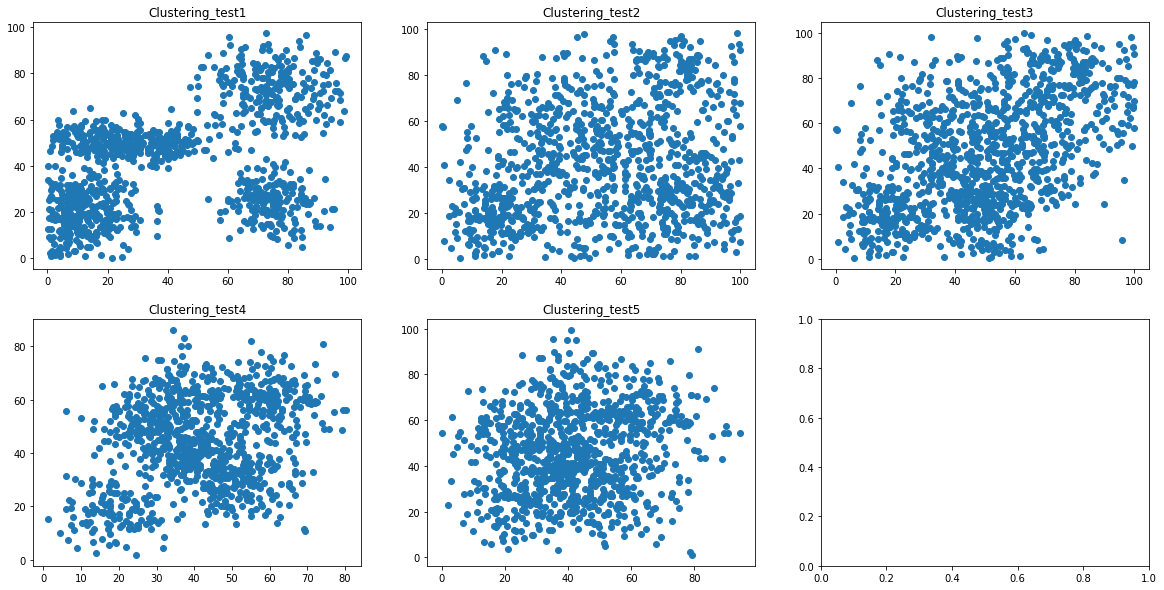

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

for name, point in data.items():
  # Extract the X and Y coordinates from the dataset
  X = point[:][0]
  Y = point[:][1]

  # Plot the dataset
  i = int(name[-1])-1
  row = i//3
  col = i%3
  axs[row,col].scatter(X, Y)
  axs[row,col].set_title(f"Clustering_test{i+1}")

## Output

In [ ]:
result = kmc_main(data)

In [ ]:
ans(result)